# [E-05] 미니 프로젝트 : 가위바위보 분류기를 만들자

<br>

## 1. Load and Prepare Data

---

<br> 

### 🔶 데이터 만들기<br>


- 구글의 `teachable machine`을 사용하여 `rock`, `scissor`, `paper` 각각 150장씩의 사진을 찍어서 저장한다.<br><br>
<img src = 'https://user-images.githubusercontent.com/103712369/168634043-7c2d3ab3-4f84-4470-9cc3-ffd37a8086e6.png' width='500' height='100'>




### 🔶 디렉토리 만들기

- **디렉토리 만들기**<br><br>
> mkdir -p ~/aiffel/rock_scissor_paper/scissor<br>
> mkdir -p ~/aiffel/rock_scissor_paper/rock<br>
> mkdir -p ~/aiffel/rock_scissor_paper/paper<br><br>
> ls -l ~/aiffel/rock_scissor_paper<br><br>

- zip 파일을 각각의 파일명과 일치하는 폴더에 각각 업로드 한다.

---

#### 클라우드 이미지 압축 해제
    - cd  ~/aiffel/rock_scissor_paper/rock (원하는 디렉토리로 이동)
    - unzip rock.zip (압축 해제 명령어 : unzip <파일명>.zip)


In [1]:
# 이미지가 잘 들어왔는지, 사이즈는 어떻게 되는지 확인해보자

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

rock_path = os.getenv('HOME') + '/aiffel/rock_scissor_paper/rock'
scissor_path = os.getenv('HOME') + '/aiffel/rock_scissor_paper/scissor'
paper_path = os.getenv('HOME') + '/aiffel/rock_scissor_paper/paper'

a_0 = os.path.join(paper_path, 'a_0.jpg')  # 웹캠이 없는 사람들이 사용할 예시 데이터를 prefix 'a_'를 붙여서 추가 저장
o_0 = os.path.join(paper_path, '0.jpg')   # google teachable 머신으로 직접 촬영한 사진 'o'

In [2]:
image_pil_a0 = Image.open(a_0)
image_pil_o0 = Image.open(o_0)
image_a0 = np.array(image_pil_a0)
image_o0 = np.array(image_pil_o0)

print(image_a0.shape); print(image_o0.shape)

(28, 28, 3)
(28, 28, 3)


In [3]:
# len(os.listdir(os.path.join(rock_scissors_paper_path, '*.jpg')))

file_list = os.listdir(paper_path)
file_list_jpg = [file for file in file_list if file.endswith('.jpg')]

len(file_list_jpg)

750

<br>△ 이미지의 크기는 224x224x3이며, rgb 3개의 채널을 가지고 있다. 또한 각각의 폴더 내 파일의 갯수(*.jpg)는 250로 셋팅하였다.<br><br>

### 🔶 데이터 불러오기 + Resize 하기

<br>

- 앞선, 노드 예제에서 사용했던 MNIST 숫자 손글씨의 경우 이미지의 크기가 28x28이었기 때문에, 우리의 가위바위보 이미지도 28x28로 만들어야 함.

In [4]:
from PIL import Image
import glob

print('PIL 라이브러리 import 완료!')

PIL 라이브러리 import 완료!


In [5]:
def resize_images(img_path):
    images = glob.glob(img_path+'/*.jpg')
    
    print(len(images), 'images to be resized.')
    
    # 파일마다 모두 28x28 사이즈로 바꾸어 저장함.
    target_size=(28, 28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, 'JPEG')
        
    print(len(images), ' images resized.')
    
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")
print("바위 이미지 resize 완료!")
print("보 이미지 resize 완료!")

750 images to be resized.
750  images resized.
750 images to be resized.
750  images resized.
750 images to be resized.
750  images resized.
가위 이미지 resize 완료!
바위 이미지 resize 완료!
보 이미지 resize 완료!


- 숫자 손글씨 인식기는 `mnist.load_data()`라는 함수로 데이터를 읽는다.<br>우리의 프로젝트 가위바위보 데이터를 읽을 수 있는 load_data()함수를 만들어보자.<br><br>
- `load_data()`는 함수의 입력으로 이미지가 있는 폴더 위치를 받는다.<br>여기서, `rock_scissor_paper`의 폴더 위치를 적어주면 된다.<br>
가위바위보의 경우 3개의 클래스 즉, **가위:0, 바위:1, 보:2**로 라벨링한다.

In [6]:
def load_data(img_path, number_of_data=300): # 가위 바위 보 이미지 갯수 총합에 주의
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)
    
    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img   # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx += 1
        
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img   # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx += 1
        
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img   # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx += 1
        
    print('학습데이터(x_train)의 이미지 개수는', idx, '입니다.')
    return imgs, labels

In [7]:
img_dir_path = os.getenv('HOME')+'/aiffel/rock_scissor_paper'
(X, y)=load_data(img_dir_path, number_of_data=2250)

학습데이터(x_train)의 이미지 개수는 2250 입니다.


<br><br>

## 2. Scale Data

---

In [8]:
print(X.max())   # 학습데이터 x_train의 min max는 0 255
print(X.min())

255
0


In [9]:
# 입력을 0 ~ 1 사이의 값으로 정규화 해야함.

X_norm = X/255.0

In [10]:
X_norm

array([[[[0.10588235, 0.10980392, 0.09019608],
         [0.10588235, 0.10980392, 0.09019608],
         [0.10588235, 0.11372549, 0.10196078],
         ...,
         [0.47058824, 0.7372549 , 0.8745098 ],
         [0.39607843, 0.68235294, 0.81960784],
         [0.2       , 0.48627451, 0.62352941]],

        [[0.07843137, 0.08235294, 0.0627451 ],
         [0.08235294, 0.08627451, 0.06666667],
         [0.08235294, 0.09019608, 0.07843137],
         ...,
         [0.28235294, 0.53333333, 0.63921569],
         [0.05490196, 0.32941176, 0.43137255],
         [0.        , 0.18823529, 0.29411765]],

        [[0.10980392, 0.11372549, 0.09411765],
         [0.10980392, 0.11372549, 0.09411765],
         [0.10196078, 0.10980392, 0.09803922],
         ...,
         [0.09803922, 0.31764706, 0.36862745],
         [0.        , 0.21568627, 0.26666667],
         [0.        , 0.21568627, 0.26666667]],

        ...,

        [[0.10588235, 0.08627451, 0.0627451 ],
         [0.1254902 , 0.11372549, 0.08627451]

In [11]:
print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))

X shape: (2250, 28, 28, 3)
y shape: (2250,)


<br>**이미지를 한번 불러와보자**<br><br>

라벨 : 0


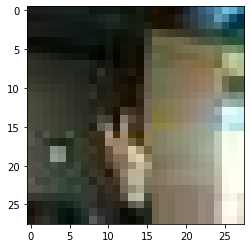

In [12]:
plt.imshow(X[0])
print('라벨 :', y[0])

<br><br>

## 3. Split Data

---

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.1, random_state=2022) 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2022)

In [14]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(1620, 28, 28, 3) (1620,)
(405, 28, 28, 3) (405,)
(225, 28, 28, 3) (225,)


<br><br>

## 4. 딥러닝 네트워크 설계하기

---

In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [16]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_channel_3=16
n_dense=512
n_train_epoch=10

In [17]:
# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             # loss=tf.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 16)          4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 16)                0

<br><br>

## 5. 딥러닝 네트워크 학습시키기

---

In [18]:
logdir='logs_2nd'

In [19]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [20]:
# 모델 훈련
hist = model.fit(X_train, y_train, epochs=n_train_epoch, validation_data=(X_val, y_val), callbacks=[tensorboard_callback])
# model.fit(X_train, y_train, epochs=n_train_epoch, validation_data=(X_val, y_val))

Epoch 1/10
51/51 [==============================] - 2s 29ms/step - loss: 0.9064 - accuracy: 0.5914 - val_loss: 0.6477 - val_accuracy: 0.7728
Epoch 2/10
51/51 [==============================] - 1s 26ms/step - loss: 0.3381 - accuracy: 0.8907 - val_loss: 0.2322 - val_accuracy: 0.9136
Epoch 3/10
51/51 [==============================] - 1s 26ms/step - loss: 0.1587 - accuracy: 0.9481 - val_loss: 0.1641 - val_accuracy: 0.9556
Epoch 4/10
51/51 [==============================] - 1s 29ms/step - loss: 0.1060 - accuracy: 0.9648 - val_loss: 0.0850 - val_accuracy: 0.9877
Epoch 5/10
51/51 [==============================] - 1s 28ms/step - loss: 0.0621 - accuracy: 0.9846 - val_loss: 0.0886 - val_accuracy: 0.9778
Epoch 6/10
51/51 [==============================] - 1s 26ms/step - loss: 0.0432 - accuracy: 0.9914 - val_loss: 0.0478 - val_accuracy: 0.9877
Epoch 7/10
51/51 [==============================] - 1s 27ms/step - loss: 0.0331 - accuracy: 0.9932 - val_loss: 0.0317 - val_accuracy: 0.9877
Epoch 8/10
51

In [21]:
hist.history

{'loss': [0.9063939452171326,
  0.33811718225479126,
  0.15868273377418518,
  0.10603906959295273,
  0.06209524720907211,
  0.04317478463053703,
  0.033061638474464417,
  0.022431347519159317,
  0.010669163428246975,
  0.007294421549886465],
 'accuracy': [0.5913580060005188,
  0.8907407522201538,
  0.9481481313705444,
  0.9648148417472839,
  0.9845678806304932,
  0.9913580417633057,
  0.9932098984718323,
  0.9950617551803589,
  1.0,
  0.9987654089927673],
 'val_loss': [0.6477359533309937,
  0.23221451044082642,
  0.16413065791130066,
  0.08501608669757843,
  0.08864646404981613,
  0.047758277505636215,
  0.03166190907359123,
  0.015668774023652077,
  0.011780737899243832,
  0.008174346759915352],
 'val_accuracy': [0.7728394865989685,
  0.9135802388191223,
  0.9555555582046509,
  0.9876543283462524,
  0.9777777791023254,
  0.9876543283462524,
  0.9876543283462524,
  1.0,
  0.9975308775901794,
  1.0]}

<br><br>

## 6. Plot Performance

---

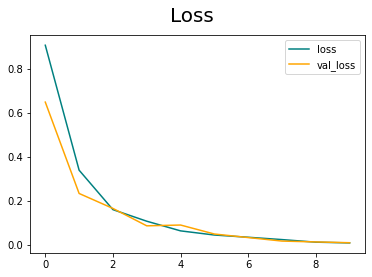

In [22]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()

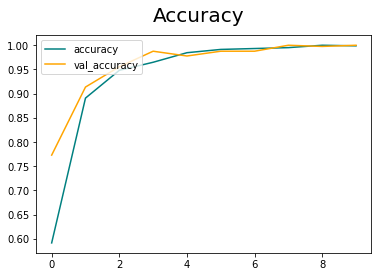

In [23]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

<br><br>

## 7. Evaluate

---

In [24]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [25]:
test_loss, test_accuracy = model.evaluate(X_test ,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

8/8 - 0s - loss: 0.0052 - accuracy: 1.0000
test_loss: 0.005198559258133173 
test_accuracy: 1.0


△ 위의 결과를 확인해보니, test data의 경우 정확도 또한 1인것을 확인할 수 있다.

In [26]:
len(X_test)

225

In [27]:
predicted_result = model.predict(X_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=41  # idx 번째 x_test를 살펴보자. 

print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [2.5094640e-03 9.9731904e-01 1.7155518e-04]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  1


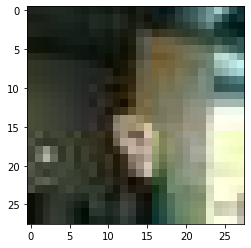

라벨 : 1


In [28]:
plt.imshow(X_test[idx],cmap=plt.cm.binary)
plt.show()
print('라벨 :', y_test[idx])

<br><br>

## 8. Another Test Data Evaluate(해창님 데이터)

---

In [29]:
testimg_dir_path = os.getenv('HOME')+'/aiffel/rock_scissor_paper/Test'
(test_X, test_y)=load_data(testimg_dir_path, number_of_data=12)

학습데이터(x_train)의 이미지 개수는 12 입니다.


In [30]:
print(test_X.shape, test_y.shape)

(12, 28, 28, 3) (12,)


In [31]:
print(test_X.max())   # 학습데이터 x_train의 min max는 0 255
print(test_X.min())

255
0


In [32]:
# 입력을 0 ~ 1 사이의 값으로 정규화 해야함.

test_X_norm = test_X/255.0

In [33]:
test_loss, test_accuracy = model.evaluate(test_X_norm ,test_y, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

1/1 - 0s - loss: 2.1406 - accuracy: 0.5833
test_loss: 2.1405599117279053 
test_accuracy: 0.5833333134651184


In [34]:
predicted_result = model.predict(test_X_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=11  #idx번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', test_y[idx])

model.predict() 결과 :  [0.00382606 0.98195136 0.01422264]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  2


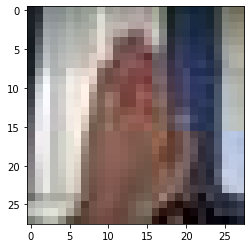

In [35]:
plt.imshow(test_X_norm[idx],cmap=plt.cm.binary)
plt.show()

잘못 예측한 갯수 : 5개 입니다.


예측확률분포: [2.8122101e-02 9.7181636e-01 6.1465063e-05]
라벨: 0, 예측결과: 1
0번째 데이터


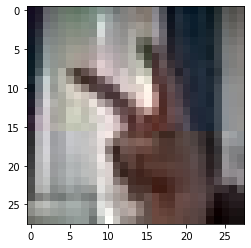

예측확률분포: [0.10327595 0.89372516 0.00299893]
라벨: 0, 예측결과: 1
1번째 데이터


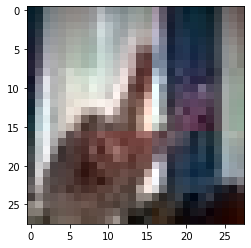

예측확률분포: [9.9780768e-01 1.5129785e-03 6.7931780e-04]
라벨: 2, 예측결과: 0
8번째 데이터


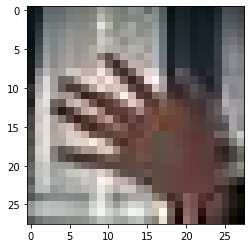

예측확률분포: [9.5914453e-01 3.9906882e-02 9.4852893e-04]
라벨: 2, 예측결과: 0
9번째 데이터


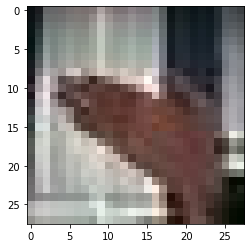

예측확률분포: [0.00382606 0.98195136 0.01422264]
라벨: 2, 예측결과: 1
11번째 데이터


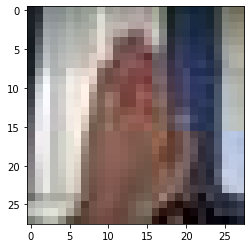

In [36]:
import random
wrong_predict_list=[]

for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != test_y[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
# samples = random.choices(population=wrong_predict_list, k=6)

print('잘못 예측한 갯수 : {}개 입니다.'.format(len(wrong_predict_list)))
print('\n==========================================================\n')

for n in wrong_predict_list:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(test_y[n]) + ", 예측결과: " + str(predicted_labels[n]))
    print(f'{n}번째 데이터')
    plt.imshow(test_X[n], cmap=plt.cm.binary)
    plt.show()

<br><br>

## 9. 정리 및 회고

---


- 이번 노드는 Google의 Teacherable Machine에서 제공하는 연속촬영 기능을 사용하여 웹캠을 통해 가위 바위 보 이미지 데이터를 직접 만들어보았다. 생각보다 편리하게 연속 촬영기능으로 데이터를 확보할 수 있었다.<br><br>
- 가위 이미지 750개(오른손, 왼손, 다른 사람의 이미지), 바위 이미지 750개(가위와 동일), 보 이미지 750개(가위와 동일) Total 2250개의 이미지를 확보하였다.<br><br>이미지 데이터의 크기는 224x224x3이였지만, 이미지의 사이즈를 28x28로 재설정해주었다. <br><br>
- 이미지 데이터들의 픽셀값 0\~255 사이의 값들을 0\~1의 범위를 갖도록 정규화를 진행해주었다. 정규화를 진행해 주는 이유는 2가지가 있다고 한다.<br>
    - 1) 학습을 더 빨리하고 2) Local optimum 에 빠지는 가능성을 줄이기 위하여...<br><br>
- tensorflow keras에서 제공하는 Sequential()모델을 사용하였고, 학습을 위해 총 9개의 히든레이어를 구성하였다. 전체 파라미터의 갯수는 19,955개이고 모델을 학습하는데 걸리는 시간은 생각보다 오래 걸리지 않았다.<br>
![image](https://user-images.githubusercontent.com/103712369/168745843-27a28652-189f-4c70-8737-9b92d7c2536c.png)<br><br>
- 학습 데이터 및 검증 데이터 그리고 테스트용 데이터는 1,620 / 405 / 225로 나누어 학습 검증을 진행하였다. <br><br>

- 결과는 `evaluate` 함수를 사용하여 진행하였고, `accuracy = 1`을 확보하였다. 추가적인 실험을 위해 해창님이 올려주신 데이터를 적용해봤는데, 생각보다 점수가 형편없이 나오는데, 계속해서 학습을 진행할 수록 overfitting이 나오는 것 같았다. epoch를 늘리면 늘릴수록 성능은 더 떨어지는 것 같았고, 히든레이어 convolutional baseline의 갯수도 몇개로 해야하는지,,, 튜닝을 거듭할 수록 뭔가 더 미궁에 빠지는 것 같았다.. 결국 해창님 데이터는 정확도 60% 남짓에서 마무리하기로 했다.. 

![image](https://user-images.githubusercontent.com/103712369/168747020-5ed3f4c0-d4fb-4b75-8c30-c86a1142adf9.png)